# Домашнее задание 8

Это домашнее задание по материалам второго семинаров. Дедлайн по отправке - 23:55 21 апреля. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне на почту: __beznosikov.an@phystech.edu__.

Решение каждой задачи необходимо поместить после её условия.

Файл должен называться: Фамилия_Имя_Optimization_HW_8

При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1

Рассмотрим билинейную седловую задачу:
\begin{equation}
\min_{x \in [-10; 10]^d} \max_{y \in [-10; 10]^d} f(x,y) = (x-b_x)^T A (y - b_y) + \frac{\lambda}{2}\| x - b_x\|^2 - \frac{\lambda}{2}\| y - b_y\|^2,
\end{equation}
где в качестве матрицы $A$ - случайно сгенерированная матрица с $L =1000$, $\mu = 0.01$, $d = 100$, $b_x$ и $b_y$ - случайные векторы c компонентами из отрезка $[-10; 10]$, $\lambda = 1$.

__(а)__ Какое решение у данной задачи? Является ли данная задача сильно выпуклой по $x$ и сильно вогнутой по $y$? Если да, то чему равна константа сильной выпуклости? Является ли оператор, соотвествующего это задаче вариационного неравенства, сильно монотонным? Липшицевым? Чему равны $L$ и $\mu$ для данного оператора? 

1. Да, задача является сильно выпуклой по x и сильно вогнутой по y, это можно проверить, взяв гессиан функции по x и по y.

$$
\nabla_x^2 f = \lambda
$$

$$
\nabla_y^2 f = -\lambda
$$

Константа сильной выпуклости равна $\lambda = 1$.

2. Найдем решение данной задачи, для этого нужно приравнять производную по x и по y нулю.

$$
\nabla_x f(x, y) = A(y-b_y) + \lambda(x-b_x) = 0
$$

$$
\nabla_y f(x, y) = A(x-b_x) - \lambda(y-b_y) = 0
$$
Следовательно, получим, что решение будет:

$$x = b_x ~\text{ и }~ y = b_y$$

Решение удовлетворяет ограничениям на то, что $x, y \in [-10, 10]^d$, т.к. $b_x, b_y \in [-10, 10]^d$.

3. Теперь посмотрим на сильную монотонность будет следовать определению.

$$z := \left(\begin{array}{cc}
              x \\
              y \end{array}\right)
$$
$$
F(z) := \left(\begin{array}{cc}
              \nabla_x f(x, y) \\
              -\nabla_y f(x, y) \end{array}\right)
$$

Найдем такую константу $\mu : \forall z_1, z_2 \rightarrow \langle F(z_1) - F(z_2), z_1 - z_2 \rangle \geq \mu ||z_1 - z_2||_2^2$

Подставим по определению F

$$
\langle
\left(
    \begin{array}{cc}
              \nabla_x f(x_1, y_1) - \nabla_x f(x_2, y_2) \\
              -\nabla_y f(x_1, y_1) + \nabla_y f(x_2, y_2)\end{array}
\right), 
\left(
    \begin{array}{cc}
              x_1 - x_2 \\
              y_1 - y_2 \end{array}
\right)
\rangle = 
$$

$$
= \langle \nabla_x f(x_1, y_1) - \nabla_x f(x_2, y_2), x_1 - x_2 \rangle - \langle \nabla_y f(x_1, y_1) - \nabla_y f(x_2, y_2), y_1 - y_2 \rangle =
$$
Подставим $\nabla_x f(x, y), \nabla_y f(x, y)$ в уравнение.

$$
= \langle A(y_1-b_y) + \lambda(x_1-b_x) - A(y_2-b_y) + \lambda(x_2-b_x), x_1 - x_2 \rangle -
$$

$$
 - \langle A(x_1-b_x) - \lambda(y_1-b_y) - A(x_2-b_x) + \lambda(y_2-b_y), y_1 - y_2 \rangle =
$$

$$
=  \langle A(y_1 - y_2), x_1 - x_2 \rangle + \langle \lambda (x_1 - x_2), x_1 - x_2 \rangle -\langle A(y_1 - y_2), x_1 - x_2 \rangle - \langle \lambda (y_1 - y_2), y_1 - y_2 \rangle = 
$$

$$
= \lambda \left( ||x_1 - x_2||_2^2 - ||y_1 - y_2||_2^2\right) \geq \mu ||z_1 - z_2||_2^2
$$
Получили, что $\mu = \lambda$

4. Липшицивость оператора вариационного неравенства.
Также будем действовать по определению: $L : \forall z_1, z_2 \rightarrow ||F(z_1) - F(z_2)||_2 \leq L \cdot ||z_1 - z_2||_2$

$$
||F(z_1) - F(z_2)||_2 \leq || \nabla_x f(x_1, y_1) - \nabla_x f(x_2, y_2)||_2 + || \nabla_y f(x_1, y_1) - \nabla_y f(x_2, y_2)||_2
$$

Подставим $\nabla_x f, \nabla_y f$ в уравнение и получим:

$$
|| \nabla_x f(x_1, y_1) - \nabla_x f(x_2, y_2)||_2 \leq ||A(y_1 - y_2) + \lambda(x_1 - x_2)||_2 \leq ||A||_2 \cdot ||y_1 - y_2 ||_2 + \lambda ||x_1 - x_2||_2
$$

$$
|| \nabla_y f(x_1, y_1) - \nabla_y f(x_2, y_2)||_2 \leq ||A(x_1 - x_2) + \lambda(y_1 - y_2)||_2 \leq ||A||_2 \cdot ||y_1 - y_2 ||_2 + \lambda ||x_1 - x_2||_2
$$

Итого получаем:
$$
||F(z_1) - F(z_2)||_2 \leq \left(||A||_2 + \lambda \right) \cdot \left(||x_1 - x_2||_2 + ||y_1 - y_2||_2 \right) \leq 2 \cdot \left(||A||_2 + \lambda \right) \cdot ||z_1 - z_2||_2
$$

Получили оценку на L:
$$
L = 2 \cdot \left(||A||_2 + \lambda \right) = 2 \cdot \left(L_A + \lambda \right)
$$

__(б)__ Решите данную задачу с помощью метода градиентного спуска(подъема) с проекцией и с помощью метода Экстраградиента с проекцией(смотри Секцию 3.3 [статью](https://arxiv.org/pdf/1802.10551.pdf)). Для начала попробуйте теоретические шаги для данных методов. Далее подберите шаг для наилучшей сходимости. Постройте график сходимости (относительное расстояние до решения по аргументу от числа подсчетов градиентов). На графике должно быть 4 линии, по две на каждый из методов. Сделайте вывод.

In [93]:
from numpy.linalg import norm
import numpy as np
from HW_8 import generate_matrix

In [94]:
import matplotlib.pyplot as plt
def draw(iters, errors, names, title):
    plt.figure(figsize=(18, 12))

    for it, err, name in zip(iters, errors, names):
        plt.plot(it, err, label=name)

    plt.legend()
    plt.title(title)
    plt.grid()
    plt.xlabel('Количество вычислений градиента')
    plt.ylabel('Ошибка')
None

In [114]:
def func(x, y, args):
    return (x - args['b_x']).T @ args['A'] @ (y - args['b_y']) + \
            0.5 * args['lambda'] * norm(x - args['b_x'], ord=2) ** 2 - \
            0.5 * args['lambda'] * norm(y - args['b_y'], ord=2) ** 2
def nabla_func_x(x, y, args):
    return -(args['A'] @ (y - args['b_y']) + args['lambda'] * (x - args['b_x']))

def nabla_func_y(x, y, args):
    return -(args['A'].T @ (x - args['b_x']) - args['lambda'] * (y - args['b_y']))

In [115]:
args = {}
args['L'] = 1000
args['mu'] = 0.01
args['d'] = 100
args['lambda'] = 1
args['A'] = generate_matrix(args['d'], args['mu'], args['L'])
args['b_x'] = 20 * (np.random.random_sample(args['d']) - 0.5)
args['b_y'] = 20 * (np.random.random_sample(args['d']) - 0.5)
x0 = 20 * (np.random.random_sample(args['d']) - 0.5)
y0 = 20 * (np.random.random_sample(args['d']) - 0.5)
z_sol = np.hstack([args['b_x'], args['b_y']])
z0 = np.hstack([x0, y0])
R0 = norm(z_sol - z0, ord=2)
args['mu'] = args['lambda']
args['L'] = 2 * (args['L'] + args['lambda'])

$$
proj(x) = \arg \min_{s \in [-10, 10]^d} \left\{||s-x||_2^2 \right\}
$$

Перепишем условие задачи, как мы это делали в первом семестре

$$
\begin{array}{lll}
    \text{min } \quad ||s-x||_2^2
    \\
    \text{s.t. } \quad \begin{array}{ll}
                             s_i \leq 10 \\
                             -s_i \leq 10 ~~~\forall i \in \overline{1, d}
                        \end{array}

\end{array}
$$
Определим e, как $(1, 1, 1, ...) \in \mathbb{R}^d$ (жирной единицы в markdowne не нашел :((( )
$$
L(x, \lambda, \mu) = ||s-x||_2^2 + \lambda^T(s-10 e) - \mu^T(s+10e)
$$
Берем производную по s:

$$
\nabla_s L(x, \lambda, \mu) = s - x + \lambda - \mu \rightarrow s = x + \mu - \lambda
$$

Вспоминаем про ККТ:
$$
\lambda_i (s_i - 10) = 0, \lambda_i \geq 0, \forall i \in \overline{1, d}
$$

$$
\mu_i (s_i + 10) = 0, \mu_i \geq 0, \forall i \in \overline{1, d}
$$

$$
-10 \leq s_i \leq 10, \forall i \in \overline{1, d}
$$

Если $x_i \in [-10, 10] \rightarrow s_i = x_i, \lambda_i = 0, \mu_i = 0$

Если $x_i > 10 \rightarrow s_i = 10, \lambda_i = x_i - 10, \mu_i = 0$

Если $x_i < -10 \rightarrow s_i = -10, \lambda_i = 0, \mu_i = -10 - x_i$

In [116]:
def proj(x, args):
    x[x > 10] = 10
    x[x < -10] = -10
    
    return x

Будем рисовать градиентный спуск-подъем с проекцией, шаг для него был получен на семинаре:
$$x^{k+1} = \text{proj}\left[x^k - \gamma_k \cdot \nabla_x f(x^k, y^k)\right]$$

$$y^{k+1} = \text{proj}\left[y^k + \gamma_k \cdot \nabla_y f(x^k, y^k)\right]$$

$lr = \frac{\mu}{L^2}$ 

И экстраградиент с проекцией: 
$$x^{k+1/2} = \text{proj}\left[x^k - \gamma_k \cdot \nabla_x f(x^{k-1/2}, y^{k-1/2})\right]$$
$$x^{k+1} = \text{proj}\left[x^k - \gamma_k \cdot \nabla_x f(x^{k+1/2}, y^{k+1/2})\right]$$
$$y^{k+1/2} = \text{proj}\left[y^k + \gamma_k \cdot \nabla_y f(x^{k-1/2}, y^{k-1/2})\right]$$
$$y^{k+1} = \text{proj}\left[y^k + \gamma_k \cdot \nabla_y f(x^{k+1/2}, y^{k+1/2})\right]$$

$lr = \frac{1}{4L}$

In [117]:
from importlib import reload
import HW_8
reload(HW_8)
from HW_8 import generate_matrix, Optimizer

In [118]:
def lr(k, args):
    return (args['с'] * args['mu']) / (args['L'] ** 2)

iter = int(1e5)
iters, errors, names = [], [], []
for с in [1, 2, 8, 16, 32, 64]:
    args['с'] = с
    gd = Optimizer(func, nabla_func_x, nabla_func_x, x0, y0, z_sol=z_sol, iter=iter, \
                   criterium='z_k - z^*', learning_rate=lr, args=args, proj_func=proj, name='gd')
    gd.work()
    it, err =  gd.error_iter()
    iters.append(it * 2)
    errors.append(err/R0)
    names.append(f'GD, q = {с}')

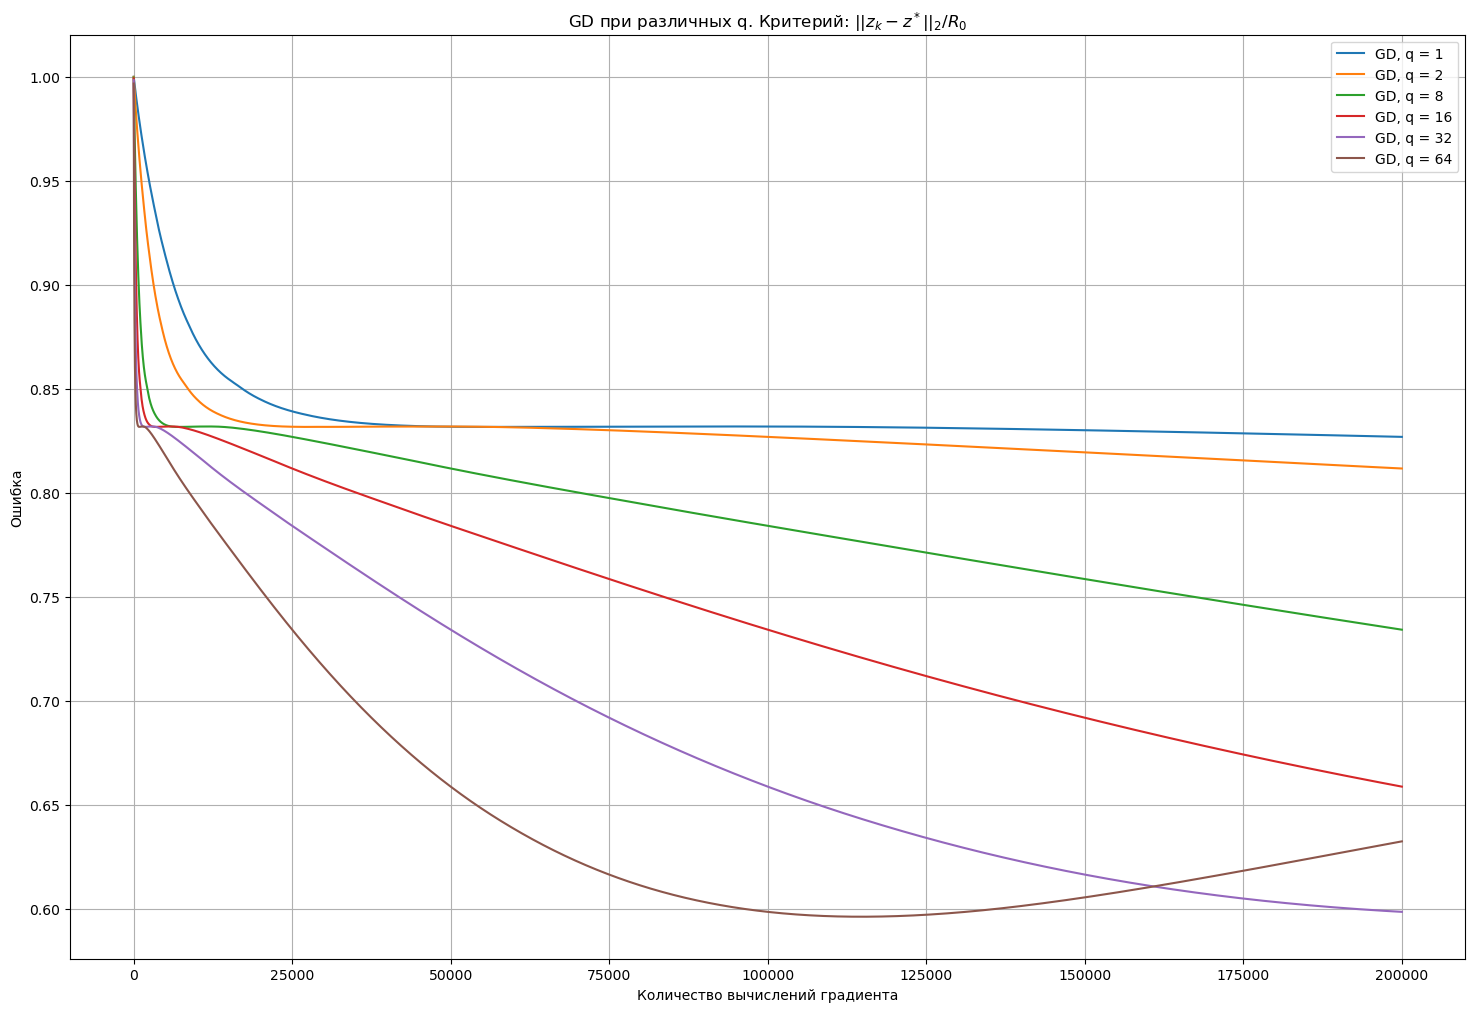

In [119]:
draw(iters, errors, names, title="GD при различных q. Критерий: $||z_k - z^*||_2 / R_0$")

In [122]:
def lr(k, args):
    return args['q'] / (4*args['L'])

iter = int(1e5)
iters_ex, errors_ex, names_ex = [], [], []
for q in [0.03, 0.04, 0.08, 0.1, 0.5, 1, 10]:
    args['q'] = q
    gd = Optimizer(func, nabla_func_x, nabla_func_x, x0, y0, z_sol=z_sol, iter=iter, \
                   criterium='z_k - z^*', learning_rate=lr, args=args, proj_func=proj, name='extragrad')
    gd.work()
    it, err =  gd.error_iter()
    iters_ex.append(it * 4)
    errors_ex.append(err/R0)
    names_ex.append(f'Extragrad, q = {q}')

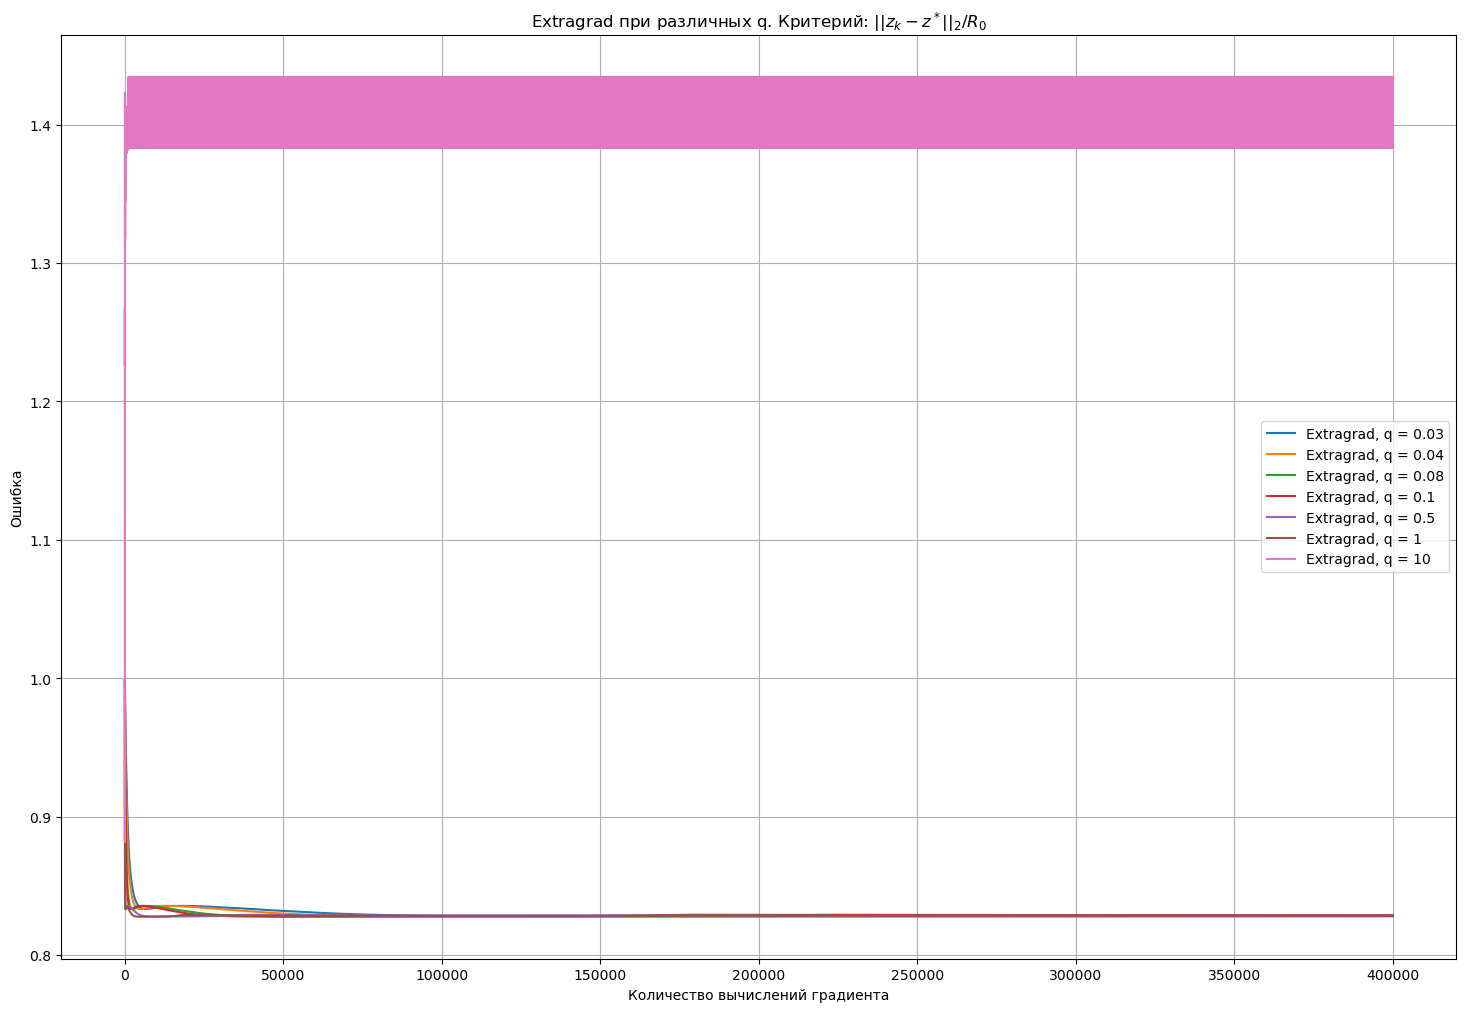

In [123]:
draw(iters_ex, errors_ex, names_ex, "Extragrad при различных q. Критерий: $||z_k - z^*||_2 / R_0$")

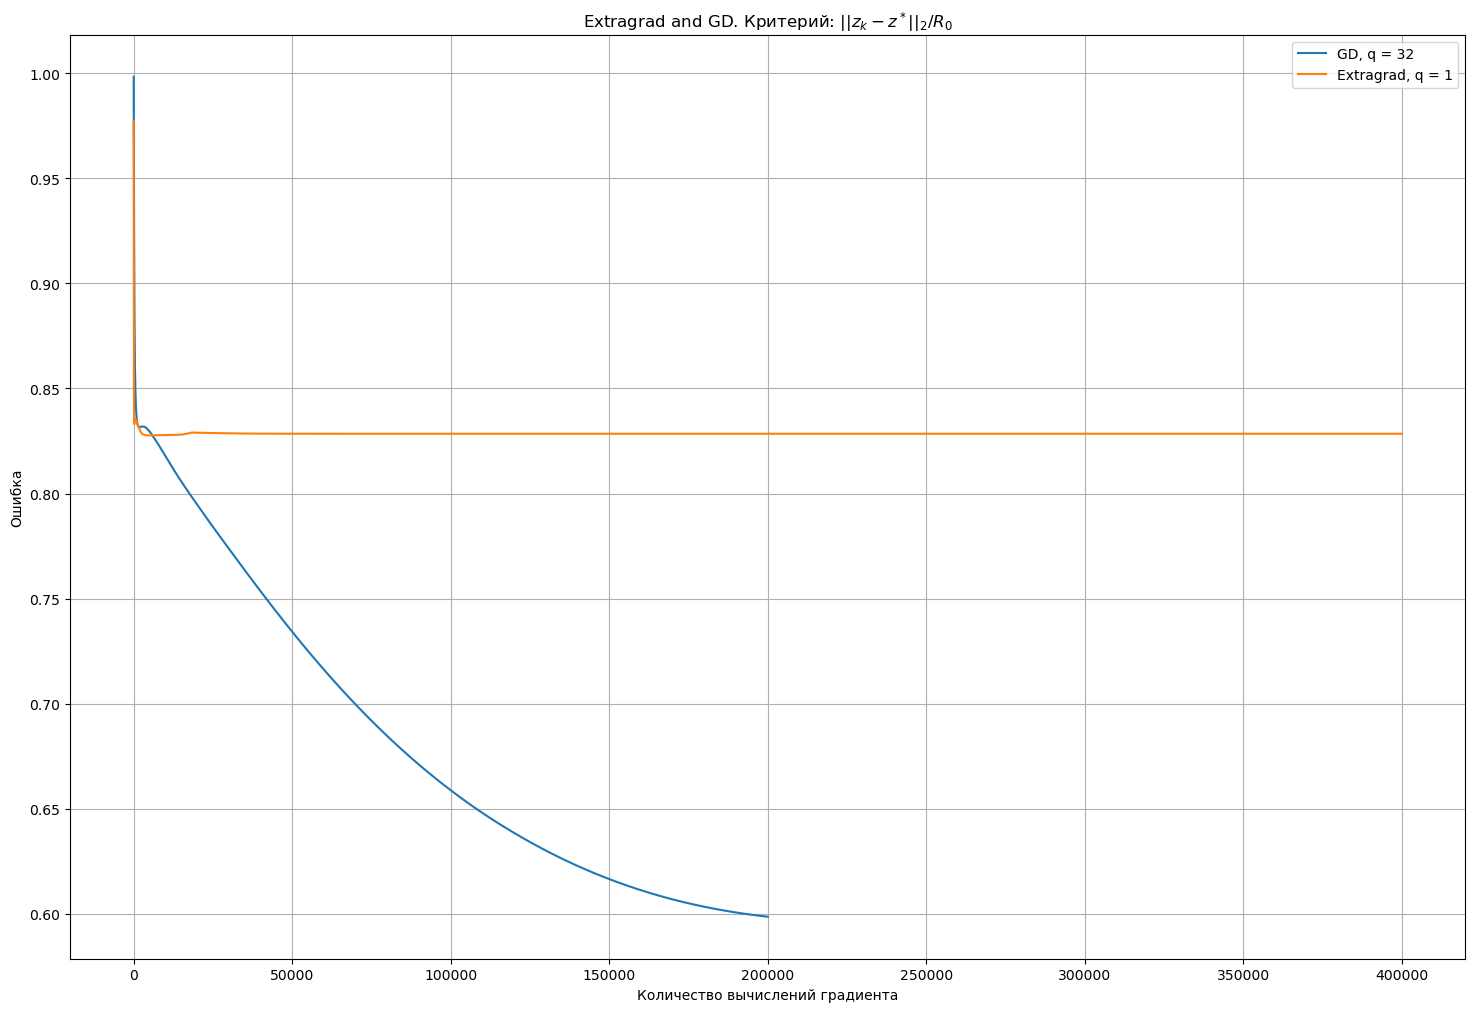

In [125]:
draw([iters[4], iters_ex[-2]], [errors[4], errors_ex[-2]], [names[4], names_ex[-2]], "Extragrad and GD. Критерий: $||z_k - z^*||_2 / R_0$")

## Задача 2

Теперь рассмотрим билинейную задачу на симплексе. Описание задачи возьмите из [лекций](https://www2.isye.gatech.edu/~nemirovs/BrazilTransparenciesJuly4.pdf) - Слайд 125 "How it Works: Policeman vs. Burglar" и следующий.

__(а)__ Сгенерируйте матрицу для данной задачи размера $n=10$ c $\theta = 1$.

У нас есть квадрат размером $10 \times 10$, в каждой целочисленной координате стоит дом.

Матрица A составляется по правилу:
$$
A_ij = w_i \cdot \left(1 - \exp{-\theta dist(i, j)} \right)
$$
Пусть $dist(i, j)$ - евклидово расстояние.
$$
w_i = \frac{1}{dist(i, i_{central})_{\infty} + 20}
$$
$i_{central}$ -- центральный дом, $dist(i, i_{central})_{\infty}$ - расстояние в бесконечной норме.

Тогда получается мы свели задачу к задаче 1, 

$$
\min_{x \in \Delta_d} \max_{y \in \Delta_d} f(x, y) = y^TAx
$$
$\Delta_d $ - симлекс, где $d = n^2 = 100$.

Из первой задачи получаем, что $\mu = 0$, $L = 2 \cdot L_a$

In [103]:
def dist(i, j, args):
    i_x = i % args['n']
    i_y = i // args['n']
    j_x = j % args['n']
    j_y = j // args['n']

    return norm([i_x - j_x, i_y - j_y], ord=args['ord'])

args['n'] = 10
args['d'] = args['n'] ** 2
i_max = (args['n'] // 2) * (args['n'] + 1) # центральная вершина
args['ord'] = np.inf
args['w'] = np.array([1./(dist(i, i_max, args) + 20) for i in range(args['d'])])
args['theta'] = 1.

args['ord'] = 2
args['A'] = np.zeros((args['d'], args['d']))
for i in range(args['d']):
    for j in range(args['d']):
        args['A'][i,j]=args['w'][i]*(1-np.exp(-args['theta']*dist(i, j, args)))

eigs, _ = np.linalg.eig(args['A'])
args['L'] = 2 * np.max(eigs).real
args['mu'] = 0
x_0 = np.random.random_sample(args['d'])
x_0 = x_0 / norm(x_0, ord=1)
y_0 = np.random.random_sample(args['d'])
y_0 = y_0 / norm(y_0, ord=1)

def f(x, y, args):
    return y.T @ args['A'] @ x

def nabla_f_x(x, y, args):
    return args['A'].T @ y

def nabla_f_y(x, y, args):    
    return args['A'] @ x

__(б)__ Для данной задачи предложите модификацию метода Экстраградиента, которая учитывает, что задача решается на симплексе. В этом может помочь [статья](https://arxiv.org/pdf/0809.0815.pdf) (смотри Секцию 3.3). Реализуйте данный метод.

Возьмём метод SMP:

$$w_x^k = D_{r^{k-1}_x}(\gamma_k \cdot \nabla_x f(r^{k-1}_x, r^{k-1}_y))$$

$$w_y^k = D_{r^{k-1}_y}(-\gamma_k \cdot \nabla_y f(r^{k-1}_x, r^{k-1}_y))$$

$$r_x^k = D_{r^{k-1}_x}(\gamma_k \cdot \nabla_x f(w^{k}_x, w^{k}_y))$$

$$r_y^k = D_{r^{k-1}_y}(-\gamma_k \cdot \nabla_y f(w^{k}_x, w^{k}_y)),$$

где 

$$(D_z(\xi))_j = \frac{z_j \exp(-\xi_j)}{\sum\limits_{i=1}^d z_i \exp(-\xi_i)} $$

Критерий сходимости у нас будет следующий:
$$\text{Err}_{\text{vi}}(z) = \max_{u \in Q}\left\{\left<F(u), z - u \right>\right\}$$

$$
Q = \Delta_d \times \Delta_d
$$

$$
z = \left(\begin{array}{cc}
              b_x \\
              b_y \end{array}\right)
$$
$$
u = \left(\begin{array}{cc}
              x \\
              y \end{array}\right)
$$
$$
F(u) = \left(\begin{array}{cc}
              \nabla_x f(x, y) \\
              -\nabla_y f(x, y) \end{array}\right) = 
        \left(\begin{array}{cc}
              A^T y \\
              -Ax \end{array}\right)$$

$$
\text{Err}_{\text{vi}}(z) = \max_{x, y \in \Delta_d} \left( y^TA(b_x - x) - x^TA^T(b_y - y) \right) = \max_{x, y \in \Delta_d} \left(y^TAb_x - b_y^TAx \right)
$$

$$
\begin{array}{lll}
    \min \quad b_y^TAx - y^TAb_x\\
    \\
    \text{s.t,.} \quad \begin{array}{ll}
                             x, y \succeq 0 \\
                             \textbf{1}^Tx = \textbf{1}^Ty = 1
                        \end{array}

\end{array}
$$

$$
L(x, y, \lambda_x, \lambda_y, \mu_x, \mu_y) = b_y^TAx - y^TAb_x - \lambda_x^Tx - \lambda_y^Ty + \mu_x(\textbf{1}^Tx - 1) + \mu_y(\textbf{1}^Ty - 1)
$$

$$
\nabla_x L = A^Tb_y - \lambda_x + \mu_x \textbf{1} = 0
$$

$$
\nabla_y L = -A^Tb_x - \lambda_y + \mu_y \textbf{1} = 0
$$

$$
\lambda_x^Tx=0, \lambda_x \succeq 0
$$

$$
\lambda_y^Ty=0, \lambda_y \succeq 0
$$

$$
\textbf{1}^Tx=\textbf{1}^Ty = 1
$$

Обозначим, 
$$
j_x = \arg \min_{j \in \overline{1, d}} \left(A^Tb_y\right)_j,
j_y = \arg \min_{j \in \overline{1, d}} \left(A^Tb_x\right)_j
$$

Получаем следующее решение системы:
$$
(\lambda_x)_j = (A^Tb_y)_j - (A^Tb_y)_{j_x} \geq 0, \mu_x = -(A^Tb_y)_{j_x}
$$

$$
(\lambda_y)_{j} = (Ab_x)_{j_y} - (A^Tb_y)_j \geq 0, \mu_y = (Ab_x)_{j_y}
$$

$$
x_{j_x} = 1, x_{j \neq j_x} = 0, y_{j_y} = 1, ~ y_{j \neq j_y} = 0
$$

Т.е. в итоге получили:

$$
\text{Err}_{\text{vi}} = \max_{j \in \overline{1, d}}(Ab_x)_j - \min_{j \in \overline{1, d}}(A^Tb_y)_j
$$

Learning rate выбираем следюущим образом (следуя статье):
$$ 
lr = \frac{1}{\sqrt{3} L}
$$


In [104]:
def lr(k, args):
    return args['c'] / (np.sqrt(3) * args['L'])

iters_smp = []
errors_smp = []
names_smp = []
solution_smp = []
iters = 3*10**3
for c in [1, 3000, 4000, 5000, 6000]:
    args['c'] = c
    smp = Optimizer(f, nabla_f_x, nabla_f_y, x_0, y_0,
                                        iter=iters,
                                        criterium='Err_vi',
                                        learning_rate=lr, args=args, 
                                        name='smp')
    smp.work()
    it, err =  smp.error_iter()
    x_sol, y_sol = smp.solution()
    iters_smp.append(it * 4)
    errors_smp.append(err)
    names_smp.append(f"SMP, c = {c}")
    solution_smp.append((x_sol, y_sol))

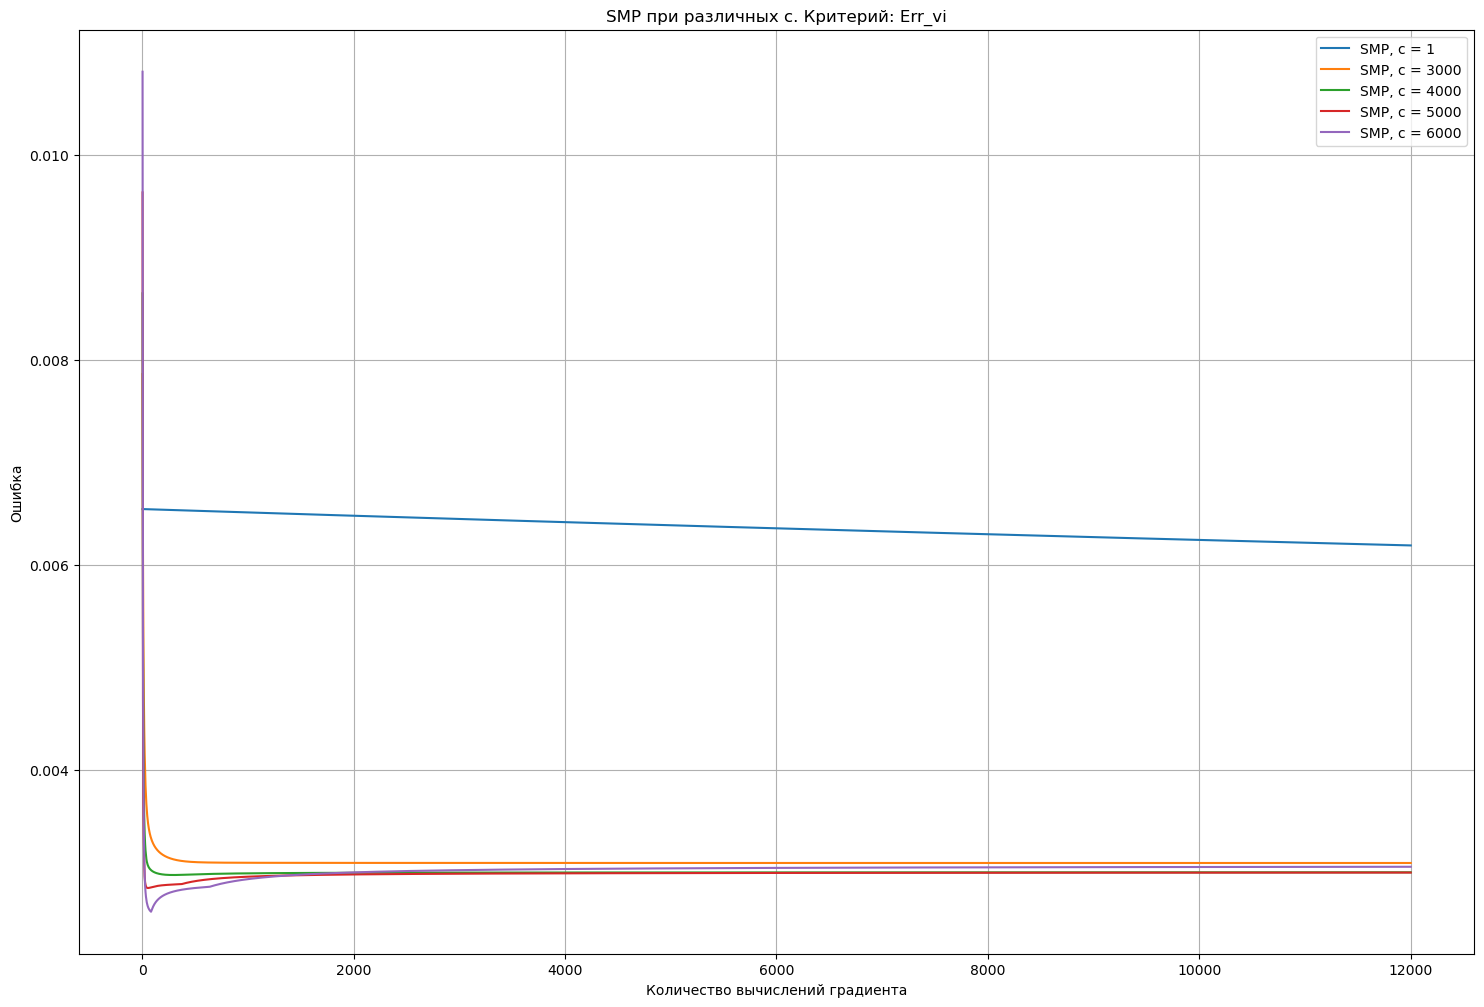

In [105]:
draw(iters_smp, errors_smp, names_smp, "SMP при различных c. Критерий: Err_vi")

__(в)__ Решите билинейную задачу на симплексе с помощью нового метода и методов из Задачи 1. Как будете измерять сходимость? Возможно, в работах, из которых были взяты методы, найдется ответ. Постройте график сходимости. Визуализирйте полученный ответ, как это сделано в файле с лекциями. Сделайте вывод.  

In [106]:
# Проекция на симплекс
def projection_simplex(x, args):
    x_sort = sorted(x, reverse=True)
    rho = 0
    summa = x_sort[0]
    summa_ans = x_sort[0]
    
    for i in range(1, len(x_sort)):
        summa += x_sort[i]
        if x_sort[i] + 1 / (i + 1) * (1 - summa) > 0:
            rho = i
            summa_ans = summa

    lamb = 1 / (rho + 1) * (1 - summa_ans)
    x_next = np.zeros(len(x_sort))

    for i in range(len(x_next)):
        x_next[i] = max(x[i] + lamb, 0)
        
    return x_next

In [129]:
def lr(k, args):
    return (args['c']) / (args['L']**2)

iters_gd = []
errors_gd = []
names_gd = []
solution_gd = []
iters = 3*10**3
for c in [1, 2, 3, 64, 128]:
    args['c'] = c
    gd = Optimizer(f, nabla_f_x, nabla_f_y, x_0, y_0,
                   iter=iters,criterium='Err_vi', learning_rate=lr,
                   args=args, proj_func=projection_simplex, name='gd')
    gd.work()
    it, err =  gd.error_iter()
    x_sol, y_sol = gd.solution()
    iters_gd.append(it)
    errors_gd.append(err)
    names_gd.append(f"GD, c = {c}")
    solution_gd.append((x_sol, y_sol))

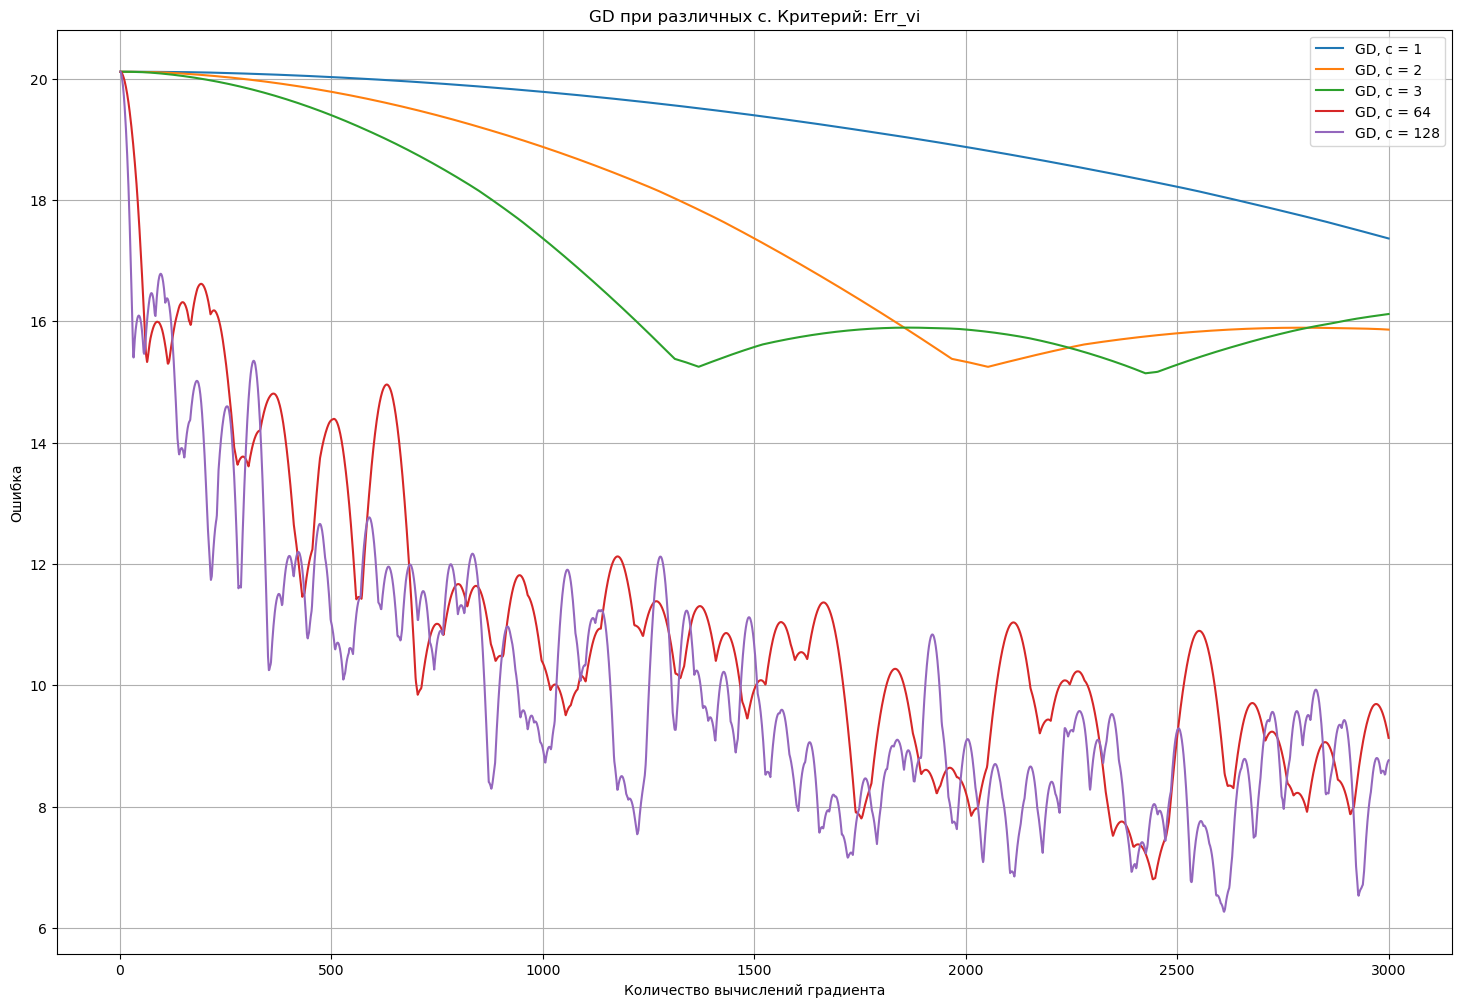

In [130]:
draw(iters_gd, errors_gd, names_gd, "GD при различных c. Критерий: Err_vi")

In [128]:
def lr(k, args):
    return args['c'] / (4 * args['L'])

iters_extragrad = []
errors_extragrad = []
names_extragrad = []
solution_extragrad = []
iters = 3*10**3
for c in [0.5, 1, 2, 4]:
    args['c'] = c
    extra = Optimizer(f, nabla_f_x, nabla_f_y, x_0, y_0,
                   iter=iters,criterium='Err_vi', learning_rate=lr,
                   args=args, proj_func=projection_simplex, name='extragrad')
    extra.work()
    it, err =  extra.error_iter()
    x_sol, y_sol = extra.solution()
    iters_extragrad.append(it*2)
    errors_extragrad.append(err)
    names_extragrad.append(f"Extragrad, c = {c}")
    solution_extragrad.append((x_sol, y_sol))

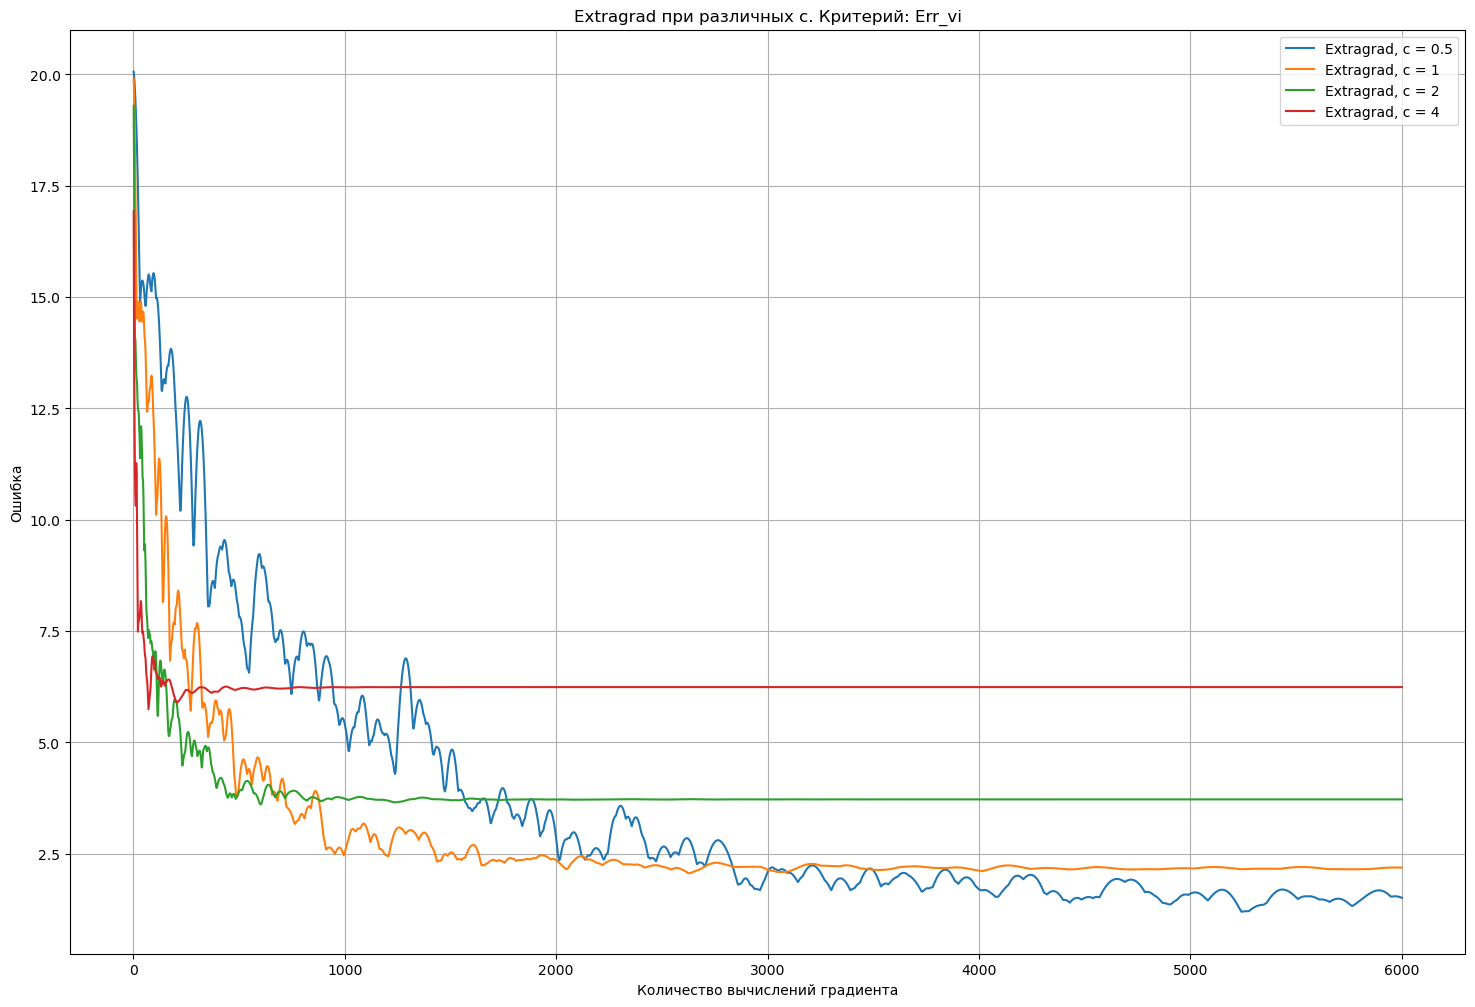

In [131]:
draw(iters_extragrad, errors_extragrad, names_extragrad, "Extragrad при различных c. Критерий: Err_vi")

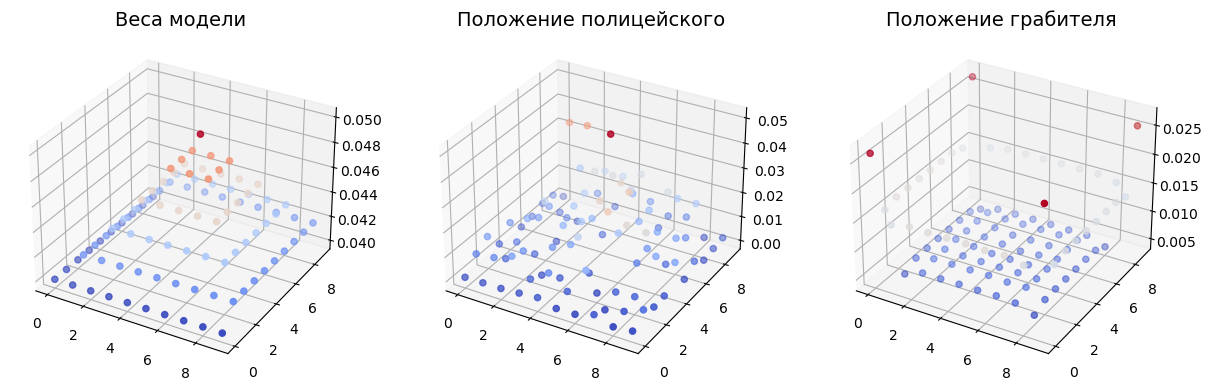

In [111]:
from matplotlib import cm
x_sol, y_sol = solution_smp[3]
X, Y = np.meshgrid(range(args['n']), range(args['n']))
X = X.ravel()
Y = Y.ravel()

# making 3D plot of adherence, usage and deviation
fig, ax = plt.subplots(1, 3, subplot_kw={"projection": "3d"}, figsize = (15, 8))

#plot
ax[0].scatter(X, Y, args['w'], c=args['w'], cmap=cm.coolwarm)
ax[0].set_title(f"Веса модели", fontsize = 14)
ax[1].scatter(X, Y, x_sol, c=x_sol, cmap=cm.coolwarm)
ax[1].set_title(f"Положение полицейского", fontsize = 14)
ax[2].scatter(X, Y, y_sol, c=y_sol, cmap=cm.coolwarm)
ax[2].set_title(f"Положение грабителя", fontsize = 14)
None

### Вывод:
Совпадает с картинками из лекций, SMP показывает лучший результат, потому что extragradient и gd показывают странные результаты на первой задаче, хотя по критерию 'Err_vi' он сходится.

__Бонусные пункты__

__(г)__ Реализуйте методы из Секции 3 [работы](https://arxiv.org/pdf/1908.08465.pdf). Решите с помощью них Задачу 1. Добавьте сходимость на график из пункта (б) Задачи 1.

In [112]:
#ответ

__(д)__ Реализуйте Алгоритм 1 и Алгоритм 2 из [работы](https://arxiv.org/pdf/2102.08352.pdf). Решите с помощью них Задачу 2 (могут помочь Секции 5 и 6 из упомянутой работы). Добавьте сходимость на график из пункта (в) Задачи 2, предварительно поменяв ось $x$ (что теперь будете откладывать по оси $x$?).

In [113]:
#ответ